# Project 3
### Kevin Liu
This is my Project 3 submission. We start off by importing all the packages we will need and reading in our mirrored data set. We check the tail to make sure it read correctly.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model as lr
from sklearn import svm
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston



data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
data.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


## Exercise 1
Here we will make our basic scatter graph. It is pretty much done for us and we can just plot it straight on since the columns and data are already organized, and the axis are determined by the question. Minor adjustments to make it larger and naming the axis's have been done as well.

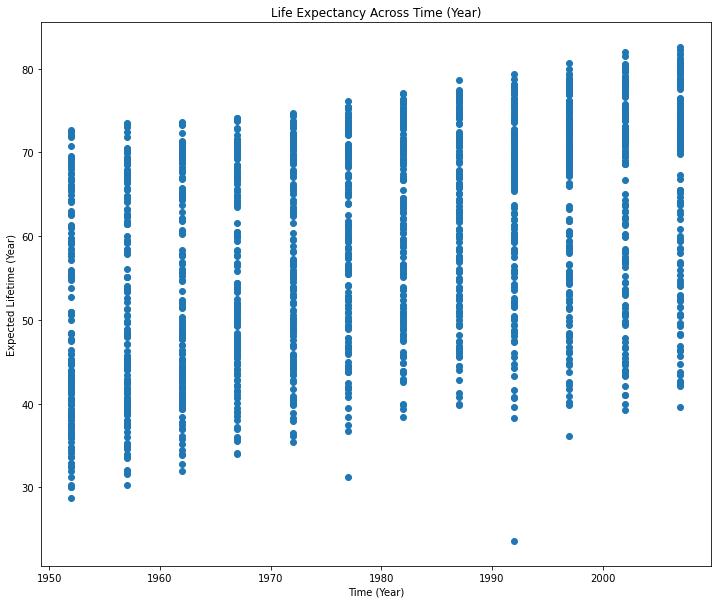

In [98]:
plt.scatter(data["year"], data["lifeExp"], marker = "o")

#Renaming Axis and other Minor Adjusments
plt.title("Life Expectancy Across Time (Year)")
plt.xlabel("Time (Year)")
plt.ylabel("Expected Lifetime (Year)")
#sizing
plt.rcParams["figure.figsize"] = (12,10)

plt.show()

## Question 1
Answering the question qualitatively, it seems that there has been a definite positive linear trend in life expectancy as time as gone on. It seems that this increase has stagnated and plateaued in the recent decade (2002 and 2007), but regardless, in in a qualititative sense, it seems that the all the average, lower bound, and upper bound, or life expectancy has generally increased each measurement year. While some years don't completely match this trend, especially starting in the 1990s, it still follows the general positive linear trend pattern.

### Violin Plot
So now we also apparently have to make a violin plot so here is our steps for making the violin plot. I tried creating the violin plot using the example given in the documentation but I couldn't get it to work so I ended up using Seaborn which I believe we are allowed to use. I formatted the data into a new table for convenience and cleaniness.

Text(0, 0.5, 'Expected Lifetime (Year)')

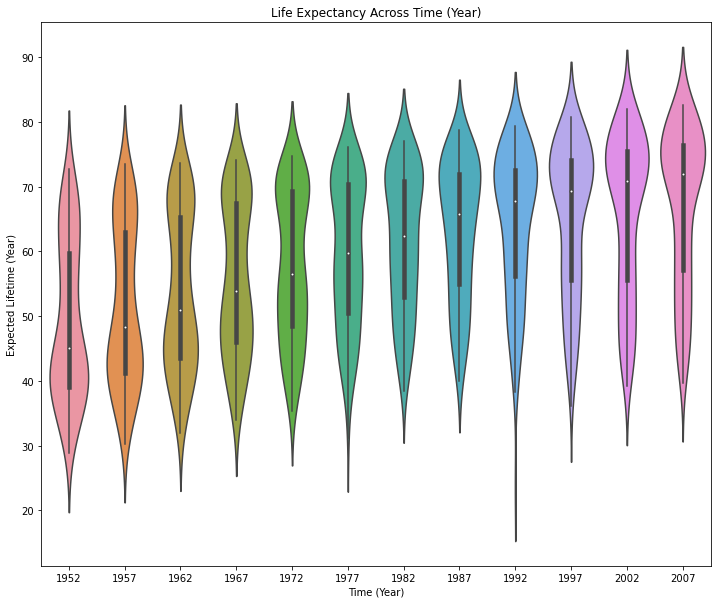

In [99]:
#Obtain the x and y data of interest
life_exp_per_year = data[["year","lifeExp"]]

#clean up data to make it work
totalData =  life_exp_per_year.sort_values("year")
totalData["lifeExp"].astype(float)

#create the chart
sns.violinplot(x = 'year', y = 'lifeExp', data = totalData)
plt.title("Life Expectancy Across Time (Year)")
plt.xlabel("Time (Year)")
plt.ylabel("Expected Lifetime (Year)")


## Question 2

The data begins by skewing towards a lower expected lifetime. However, as time goes on, it evens out and actually begins to skew towards a higher expected life time. The data is unimodal. With the high variance and skewness, the data is rarely symmetric around it's center.

## Question 3

In my opinion, we have a visibly clear positive linear relationship within the two variables, and I think that it would reject the null hypothesis. While I think this is significant enough, it could be close- especially since the latter years sort of break the trend and plateau out.

## Question 4

Well since we have residuals of a linear model on a linear data set, I would believe the data or the residuals would center and distribute around 0. There would definitely be outliers like the ones we have currently though since some outliers are extreme.

## Question 5

There are parts that make me worry, including how the linear regression will probably be consistently off towards the more recent years, making it consistently a bit off (probably guessing a bit too high versus reality or having a high residual). Additionally, there are extreme outliers and high skewness in some years. However, I still think that the majority of it will center around 0, it just might deviate off of it towards the recent years.

## Exercise 2
Now we begin to create a linear regression model. Since the data is already pretty clean for us, we just need to access it and run it through the imported package.

In [100]:
#Begin Exercise 2, we already have imported linearregression from scikit as lr. Now we begin by getting the x and y values from years and lifeExp
x = [[x] for x in data['year'].values]
y = [[y] for y in data['lifeExp'].values]

#with it set up, run the given function
reg = lr.LinearRegression()
regfit = reg.fit(x, y)

#formatting it to print
m = str(reg.coef_[0]).lstrip('[').rstrip(']')
b = str(reg.intercept_).lstrip('[').rstrip(']')

print(f"The Slope is: {m} \nThe Intercept is: {b} \nFunction: y = {m}x + {b}")

The Slope is: 0.32590383 
The Intercept is: -585.65218744 
Function: y = 0.32590383x + -585.65218744


## Question 6
Since this is just asking the slope, it would just be m, or 0.32590383. This means that for each year (x), life expectancy rises by .32590383 years.

## Question 7

In [101]:
#we use another package called statsmodels to calculate p values
x2  = sm.add_constant(x)
est  = sm.OLS(y, x2)
_2  = est.fit()
print(_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           7.55e-80
Time:                        23:52:03   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -585.6522     32.314    -18.124      0.0

As we can see from out statsmodel calculation,  it seems that our p value (located in the P > |t| and Prob (F-Statistic) column and row, respectively), is almost 0, and is therefore much smaller than any signicifance level. This means that at a significance level of .05, or any other commonly used significance level, the null hypothesis can be rejected, and that there is a definite relationship between year and life expectancy.

## Exercise 3
Here we are going to have to make a residual vs year and plot it in a violin plot. What we have right now is our ability to make the violin plot and the data to make a residual. All we have to do now is find a way to create a column of all the residuals and then reapply it to our violin plot.

[Text(0.5, 1.0, 'Residual vs Year'),
 Text(0.5, 0, 'Time (Year)'),
 Text(0, 0.5, 'Residual')]

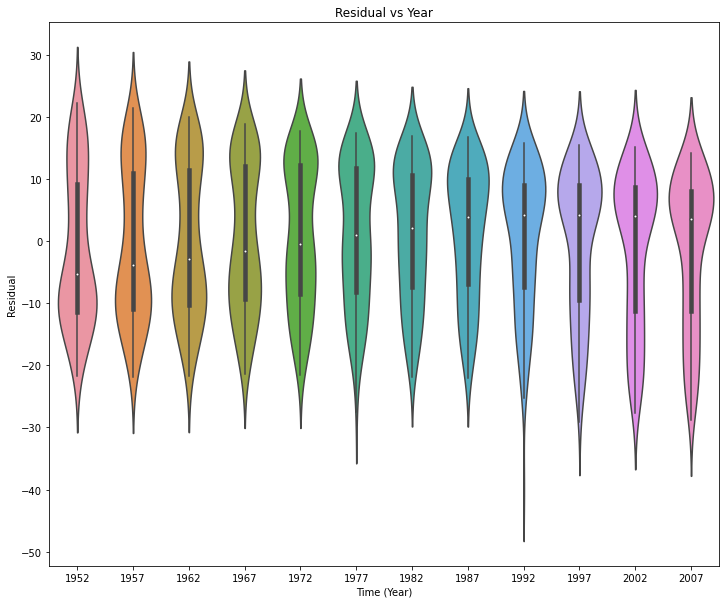

In [102]:
#so first we make a new column, residual, that is derived from current columns and are previously calculated data
data["resid"] = data["lifeExp"] - (data["year"] * reg.coef_[0] + reg.intercept_)

#with that done we literally just did we did last time and make another violin plot!
sns.violinplot(x = "year", y = "resid", data = data).set(
        title = "Residual vs Year",
        xlabel = "Time (Year)",
        ylabel = "Residual")

## Question 8
Going back, I said in Question 4 that I expected "the data or the residuals would center and distribute around 0. There would definitely be outliers". I think here it is pretty close. The residuals do center around 0, though I find it interesting to find an almost parabolic relationship between the means vs time (year). I also did expected residual outliers but I really did not expect the drastic one in 1992. I am curious to see which country that it is and what happened there. It is also pretty reasonable that most outliers are for lower life expectancies than for higher ones.

## Exercise 4
Luckily, seaborn once again seems to work great for us. It will take in this new residual column and group by continents automatically. We simply need to copy and paste what we had before and make some minor adjustments.

[Text(0.5, 1.0, 'Residual vs Continent'),
 Text(0.5, 0, 'Continent'),
 Text(0, 0.5, 'Residual')]

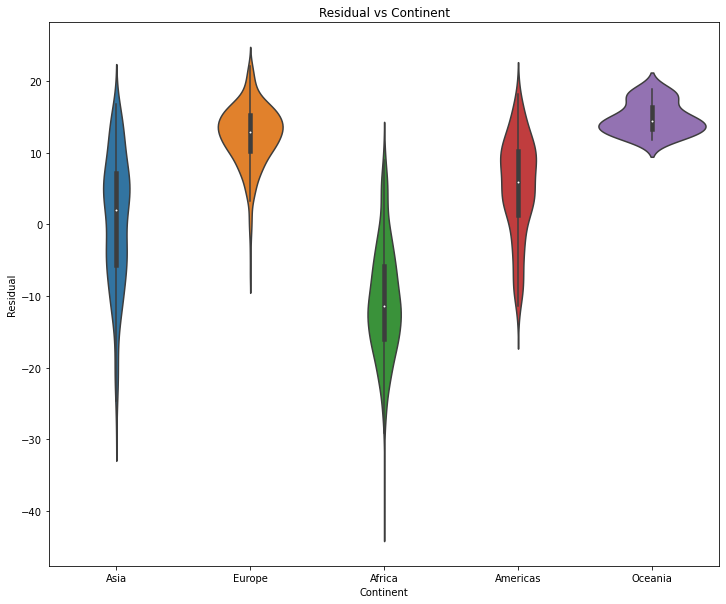

In [103]:
#Making minor adjustments to our previous code to make violin plots by continent and residual
sns.violinplot(x = "continent", y = "resid", data = data).set(
        title = "Residual vs Continent",
        xlabel = "Continent",
        ylabel = "Residual")

## Question 9
There definitely seems to be a dependency. The Continent's themselves vary wildly in their residual patterns in terms of distribution, average, outliers, etc. Some parts of this is surprising and having a broad residual model without accounting for Continent seems to hide a lot of other trends. I am curious to what these distributions across continents and the spread within continents themselves (something we couldn't see until now), reveals about real world issues like inequality. Back to the question, when conducting a regression analysis of life expectancy across time, I now think it is extremely important to break it down further into other subcategories like continents. Additionally, I wonder what other subcategorical trends are missing, what if we sort by ranges of HDI? Population Density? Air Pollution levels?

## Exercise 5
So for this exercise I will be plotting by Continent and creating 5 different subgraphs. My procedure will go like this: First, I will create 5 data frames for each continent and put the data in there. Then I will create a linear regression for all 5. Then, finally, I will plot them together.

Asia: Function: y = 0.4531224x + -836.89089529
Europe: Function: y = 0.22193214x + -367.41099397
Africa: Function: y = 0.28952926x + -524.25784607
Americas: Function: y = 0.36765094x + -663.10629325
Oceania: Function: y = 0.21027238x + -341.90796317


Text(0.5, 1.0, 'Life Expectancy VS Time, Oceania')

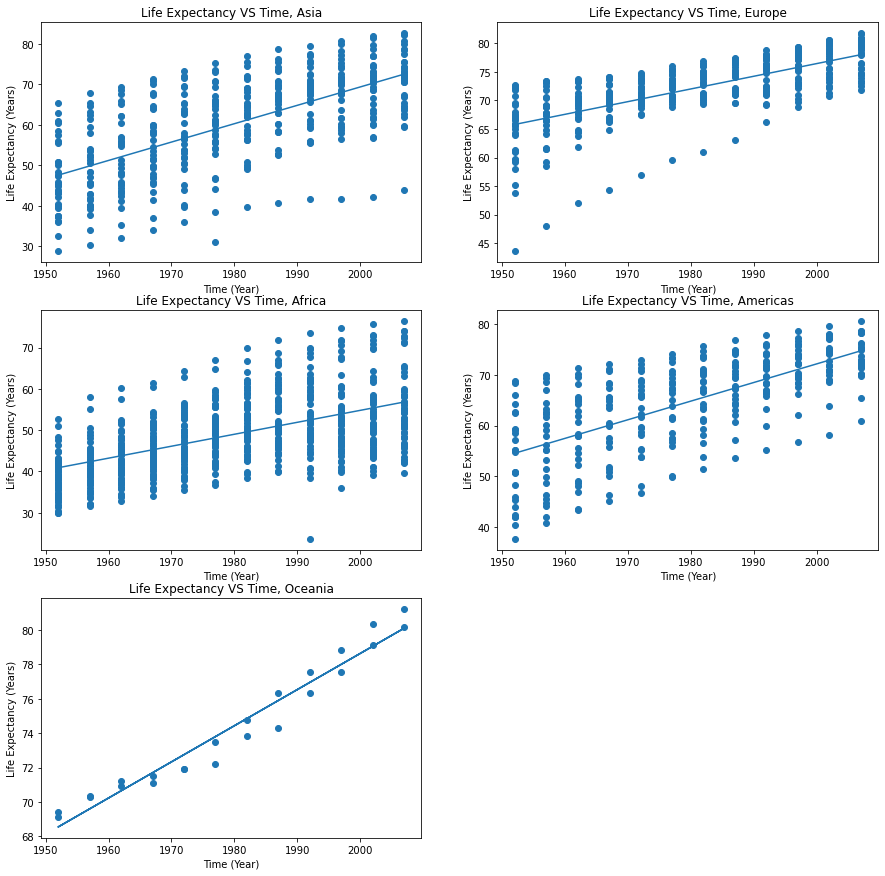

In [104]:
# First things first, I want to get 5 dataframes, each for a continent.
asiaDF = data[data["continent"] == "Asia"]
europeDF = data[data["continent"] == "Europe"]
africaDF = data[data["continent"] == "Africa"]
americasDF = data[data["continent"] == "Americas"]
oceaniaDF = data[data["continent"] == "Oceania"]

#now that we have the five datafames, we will create a linear regression for all 5. Since we have already done this before, we can just copy 
#and paste our code from before and finish this up.

#----------ASIA----------
x1 = [[x] for x in asiaDF['year'].values]
y = [[y] for y in asiaDF['lifeExp'].values]
asiaLR = lr.LinearRegression()
asiaLR.fit(x1, y)

#formatting it to print
m = str(asiaLR.coef_[0]).lstrip('[').rstrip(']')
b = str(asiaLR.intercept_).lstrip('[').rstrip(']')
print(f"Asia: Function: y = {m}x + {b}")

#----------Europe----------
x2 = [[x] for x in europeDF['year'].values]
y = [[y] for y in europeDF['lifeExp'].values]
europeLR = lr.LinearRegression()
europeLR.fit(x2, y)

#formatting it to print
m = str(europeLR.coef_[0]).lstrip('[').rstrip(']')
b = str(europeLR.intercept_).lstrip('[').rstrip(']')
print(f"Europe: Function: y = {m}x + {b}")

#----------Africa----------
x3 = [[x] for x in africaDF['year'].values]
y = [[y] for y in africaDF['lifeExp'].values]
africaLR = lr.LinearRegression()
africaLR.fit(x3, y)

#formatting it to print
m = str(africaLR.coef_[0]).lstrip('[').rstrip(']')
b = str(africaLR.intercept_).lstrip('[').rstrip(']')
print(f"Africa: Function: y = {m}x + {b}")

#----------Americas----------
x4 = [[x] for x in americasDF['year'].values]
y = [[y] for y in americasDF['lifeExp'].values]
americasLR = lr.LinearRegression()
americasLR.fit(x4, y)

#formatting it to print
m = str(americasLR.coef_[0]).lstrip('[').rstrip(']')
b = str(americasLR.intercept_).lstrip('[').rstrip(']')
print(f"Americas: Function: y = {m}x + {b}")

#----------Oceania----------
x5 = [[x] for x in oceaniaDF['year'].values]
y = [[y] for y in oceaniaDF['lifeExp'].values]
oceaniaLR = lr.LinearRegression()
oceaniaLR.fit(x5, y)

#formatting it to print
m = str(oceaniaLR.coef_[0]).lstrip('[').rstrip(']')
b = str(oceaniaLR.intercept_).lstrip('[').rstrip(']')
print(f"Oceania: Function: y = {m}x + {b}")

#finally, we plot! setting up graph with 5 subplots
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)

#actual plotting
ax1.scatter(asiaDF["year"], asiaDF["lifeExp"], marker = "o")
ax1.plot(x1, asiaLR.predict(x1))
ax2.scatter(europeDF["year"], europeDF["lifeExp"], marker = "o")
ax2.plot(x2, europeLR.predict(x2))
ax3.scatter(africaDF["year"], africaDF["lifeExp"], marker = "o")
ax3.plot(x3, africaLR.predict(x3))
ax4.scatter(americasDF["year"], americasDF["lifeExp"], marker = "o")
ax4.plot(x4, americasLR.predict(x4))
ax5.scatter(oceaniaDF["year"], oceaniaDF["lifeExp"], marker = "o")
ax5.plot(x5, oceaniaLR.predict(x5))

#labelling
ax1.set_xlabel("Time (Year)")
ax2.set_xlabel("Time (Year)")
ax3.set_xlabel("Time (Year)")
ax4.set_xlabel("Time (Year)")
ax5.set_xlabel("Time (Year)")

ax1.set_ylabel("Life Expectancy (Years)")
ax2.set_ylabel("Life Expectancy (Years)")
ax3.set_ylabel("Life Expectancy (Years)")
ax4.set_ylabel("Life Expectancy (Years)")
ax5.set_ylabel("Life Expectancy (Years)")


ax1.set_title("Life Expectancy VS Time, Asia")
ax2.set_title("Life Expectancy VS Time, Europe")
ax3.set_title("Life Expectancy VS Time, Africa")
ax4.set_title("Life Expectancy VS Time, Americas")
ax5.set_title("Life Expectancy VS Time, Oceania")

## Question 10
While we decided that continent is already a large factor, it also seems that year is also a factor in how much continent effects life expectancy and vice versa. They influence each others effect on life expectancy and therefore I think it would be beneficial to add an interaction term.

## Exercise 6


In [105]:
#sigh
# x = [[x,0] for x in data['year'].values] +  [[x,1] for x in data['Continent'].values]
# y = [[y] for y in data['lifeExp'].values]

# #with it set up, run the given function
# reg = lr.LinearRegression()
# regfit = reg.fit(x, y)

In [106]:
# #bias is 0
# xy = data[['year', 'lifeExp']]
# #creating X class
# X = [[x] for x in xy.values]

# #creating Y class
# y = [[]]
# #for i in X:

# xy

## Question 11


## Question 12
Going back to our linear regressions, we have these equations.

Asia: Function: y = 0.4531224x + -836.89089529

Europe: Function: y = 0.22193214x + -367.41099397

Africa: Function: y = 0.28952926x + -524.25784607

Americas: Function: y = 0.36765094x + -663.10629325

Oceania: Function: y = 0.21027238x + -341.90796317


The slope (m) values represent the estimated increase in life span each year (x value). Therefore, the expected increase in life span each year is:

Asia: .45 Years

Europe: .22 Years

Africa: .29 Years

Americas: .37 Years

Oceania: .21 Years


## Exercise 7
This is really similar to what we have already been doing, and since we have a column of residuals already, this should be pretty smooth to create. But also I have no interaction model so this is just the same thing as previous. :(

[Text(0.5, 1.0, 'Year vs Residual'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Residual')]

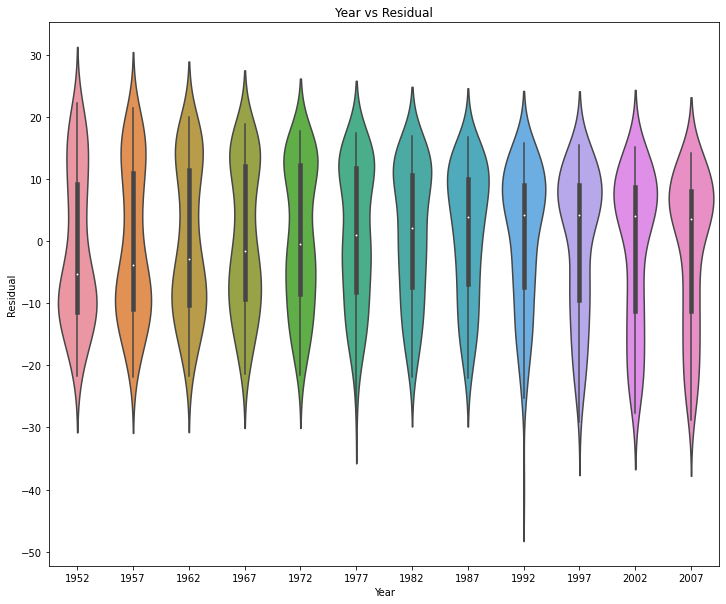

In [107]:
sns.violinplot(x = "year", y = "resid", data = data).set(
        title = "Year vs Residual",
        xlabel = "Year",
        ylabel = "Residual")

# Part 2, Diabetes
Here we begin Part 2. We load in the diabetes dataset from SKlearn and then obtain training and test data. We then run 2 regression models, one is a decision tree and the other a k nearest neighbor regression. The diabetes data set provides multiple columns, including things like sex, BMI, average blood pressure, and total cholesterol. We used BMI as our predictive variable. The target set provided and being predicted is "a quantitative measure of disease progression one year after baseline" according to dataset documentation. Therefore, we are essentially seeing if we can create models that predict quantitatively the measurement of a disease progression one year after baseline depending on patient BMI.

In [108]:
# Load the diabetes dataset
data = datasets.load_diabetes()
x = data.data
y = data.target

#getting training and test data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

#running a decision tree Regression
modelDT = DecisionTreeRegressor()
modelDT = modelDT.fit(diabetes_X_train, diabetes_y_train)
yPredDT = modelDT.predict(diabetes_X_test)

#next is a k nearest neighbor regression
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(diabetes_X_train, diabetes_y_train)
yPredKN = neigh.predict(diabetes_X_test)

#Calculating Mean Absolute Error as a prediction performance.
print("Mean Absolute Error of the Decision Tree Regression: ", metrics.mean_absolute_error(diabetes_y_test, yPredDT))
print("Mean Absolute Error of the Nearest Neighbor Regression: ", metrics.mean_absolute_error(diabetes_y_test, yPredKN))

#Calculating max error as a prediction performance
print("Max Error of the Decision Tree Regression: ", metrics.max_error(diabetes_y_test, yPredDT))
print("Max Error of the Nearest Neighbor Regression: ", metrics.max_error(diabetes_y_test, yPredKN))

Mean Absolute Error of the Decision Tree Regression:  64.30337078651685
Mean Absolute Error of the Nearest Neighbor Regression:  50.96067415730337
Max Error of the Decision Tree Regression:  294.0
Max Error of the Nearest Neighbor Regression:  167.0


Since we are using a regression model, I had to decide on what metric to compare. I decided to use the mean absolute error as I am curious to see which regression model predicts closest to the test set. I messed around with the sizing of the training sets and other variables and in general, the mean absolute error were pretty similar, which I found interesting. I also found it interesting that these two tree regression models were relatively close.

I then decided to also use another metric, max error, to see how well the regressions model faired. It was actually rediculous on how off the Decision Tree regression was on its max error.